# Missing Issue and Imputation

## About this Notebook
In this notebook, the missing issue of `Temp_m` and `Irradience_m` of generators in north cluster is studied. Also, some imputation techniques are proposed to recover these important feature values.

## Import Packages

In [1]:
import os
import warnings
import pickle
import sys
sys.path.append("../")

import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor#, HistGradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from metadata import *
from eda import summarize, plot_univar_dist, plot_bivar, colors
from data.data_processor import DataProcessor
from data.fe import FE

warnings.simplefilter("ignore")
pd.set_option("max_column", None)
sns.set_style("darkgrid")

## Weather Data Imputation
The imputation is done by replacing `NaN` with the corresponding values from the neighbor station.

In [3]:
train_s = pd.read_csv("../data/processed/0603/train_s.csv")
train_n = pd.read_csv("../data/processed/0603/train_n.csv")

with open("../config/dp.yaml", "r") as f:
    dp_cfg = yaml.full_load(f)

### *South Cluster*
Imputation for `WDGust` and `RHMin` seems not convincing. 

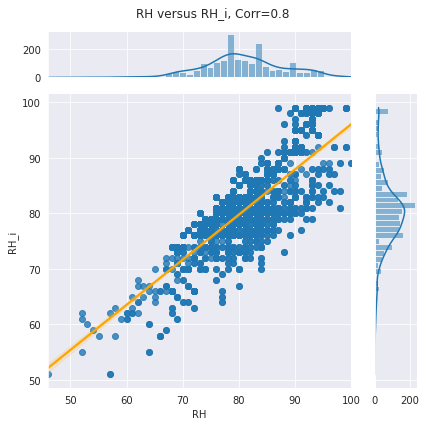

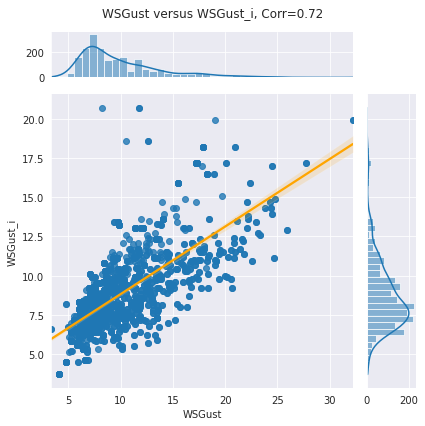

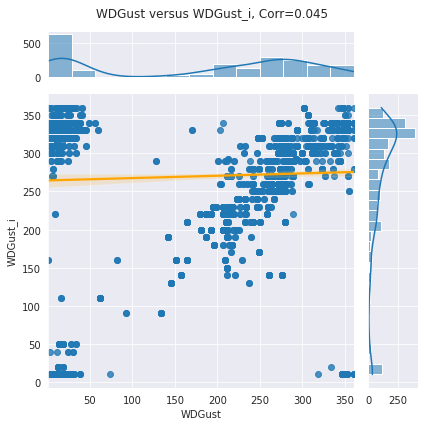

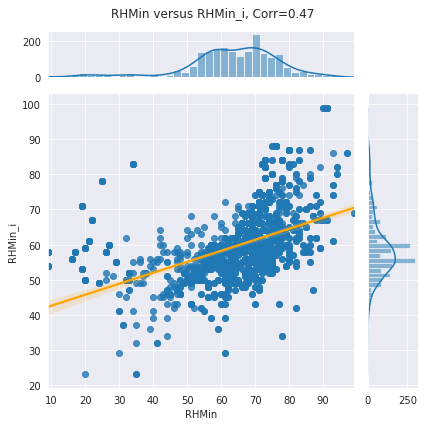

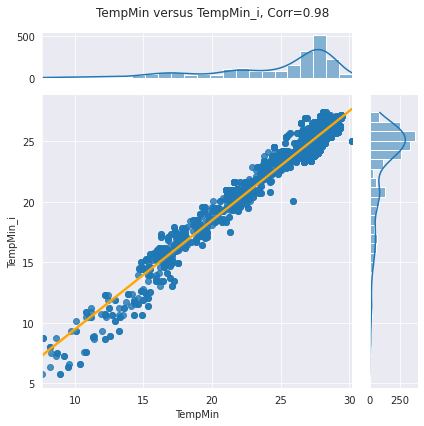

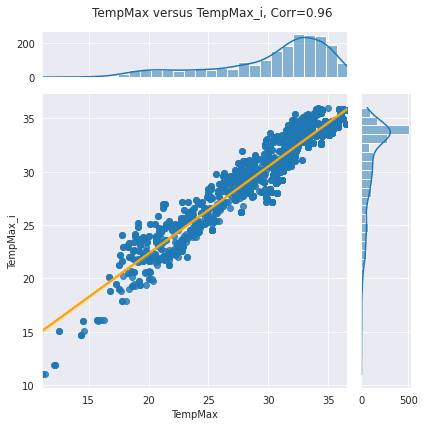

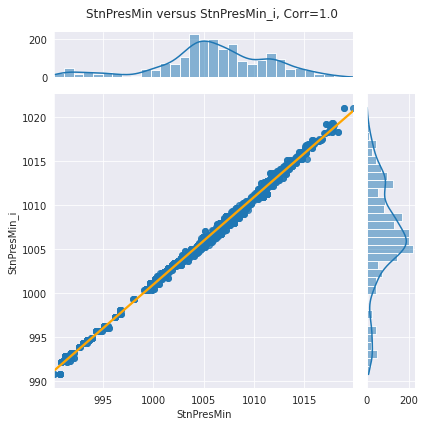

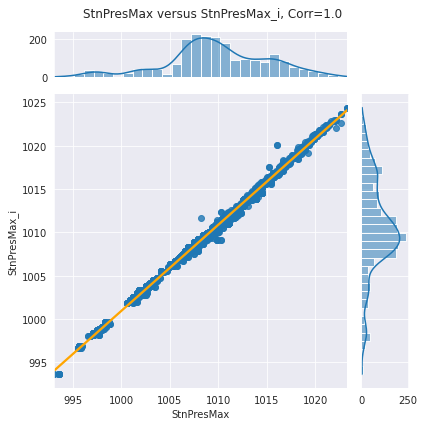

In [4]:
for f in ["RH", "WSGust", "WDGust", "RHMin", 
          "TempMin", "TempMax", "StnPresMin", "StnPresMax"]:
    plot_bivar(train_s, [f, f"{f}_i"])

In [5]:
for f in ["RH", "WSGust", "WDGust", "RHMin", 
          "TempMin", "TempMax", "StnPresMin", "StnPresMax"]:
    f_na_idx = train_s[f].isna()
    train_s.loc[f_na_idx, f] = train_s.loc[f_na_idx, f"{f}_i"]
summarize(train_s, "train_s Imputed", 1)

=====Summary of train_s Imputed=====


,Date,Lat,Lon,Irradiance,Temp,Module,Capacity,Angle,Irradiance_m,Temp_m,Generation,Location,Irradiance_gap,Irradiance_dev,TempSta,IrraSta,StnPres,StnPresMax,StnPresMin,Temp_t,TempMax,TempMin,RH,RHMin,WS,WD,WSGust,WDGust,Precp,StaName,StnPres_i,SeaPres,StnPresMax_i,StnPresMin_i,Temp_i,TempMax_i,TempMin_i,TdDewPoint,RH_i,RHMin_i,WS_i,WD_i,WSGust_i,WDGust_i,Precp_i,PrecpMax10,PrecpMax60,SunShine,Irradiance_i,StaName_i,TempDiff,IrraDiff,clust
0,2020-09-23,24.107,120.44,21.83,27.8,AUO PM060MW3 320W,492.8,4.63,558.6768,47.2,2351,24.107-120.44,536.8468,True,xx,tca,1007.5,1008.6,1006.3,27.8,30.5,24.9,74.0,65.0,3.3,24.0,10.3,11.0,0.0,xx,1008.4,1009.2,1009.4,1007.1,27.2,32.8,23.2,22.1,74.0,57.0,1.8,320.0,7.7,310.0,0.0,0.0,0.0,9.9,21.83,tca,0.0,0.0,S


Shape: (2126, 53)
NaN ratio:


,Irradiance_gap,Date,WS_i,StaName,StnPres_i,SeaPres,StnPresMax_i,StnPresMin_i,Temp_i,TempMax_i,TempMin_i,TdDewPoint,RH_i,RHMin_i,WD_i,WDGust,WSGust_i,WDGust_i,Precp_i,PrecpMax10,PrecpMax60,SunShine,Irradiance_i,StaName_i,TempDiff,IrraDiff,Precp,WSGust,Lat,Irradiance_dev,Lon,Irradiance,Temp,Module,Capacity,Angle,Irradiance_m,Temp_m,Generation,Location,TempSta,WD,IrraSta,StnPres,StnPresMax,StnPresMin,Temp_t,TempMax,TempMin,RH,RHMin,WS,clust
NaN Ratio,0.28222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Zero ratio:


,IrraDiff,TempDiff,Precp,Precp_i,PrecpMax60,PrecpMax10,Angle,Irradiance_dev,RH_i,StnPresMax_i,SeaPres,StnPresMin_i,Temp_i,StnPres_i,TempMax_i,TempMin_i,TdDewPoint,Date,RHMin_i,WS_i,WD_i,WSGust_i,WDGust_i,SunShine,Irradiance_i,StaName_i,StaName,WSGust,WDGust,TempSta,Lon,Irradiance,Temp,Module,Capacity,Irradiance_m,Temp_m,Generation,Location,Irradiance_gap,IrraSta,Lat,StnPres,StnPresMax,StnPresMin,Temp_t,TempMax,TempMin,RH,RHMin,WS,WD,clust
Zero Ratio,100.0,97.554092,77.5635,76.387582,76.058325,76.058325,20.88429,2.210724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### *North Cluster*
Imputation of `RHMin`, `WD`, `WDGust` seems not convincing. What's worse, the missing issue occurs in source column for imputation, either. Hence, some missing entries still exist after imputation. After observation, I think impututing those entries with simple statistics when doing data processing is acceptible.

In [6]:
train_n.columns[train_n.isna().any()]

Index(['Temp_m', 'Irradiance_gap', 'Temp_t', 'StaName', 'SeaPres', 'Temp_i',
       'TempMax_i', 'TempMin_i', 'TdDewPoint', 'WD_i', 'PrecpMax10',
       'PrecpMax60', 'TempDiff'],
      dtype='object')

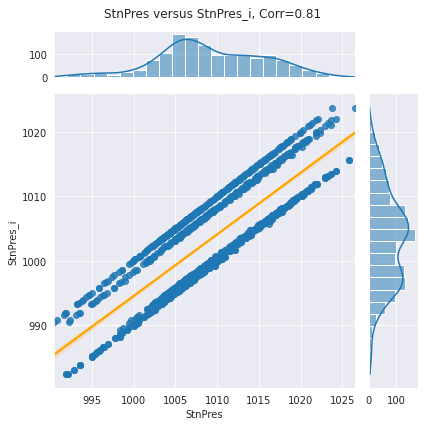

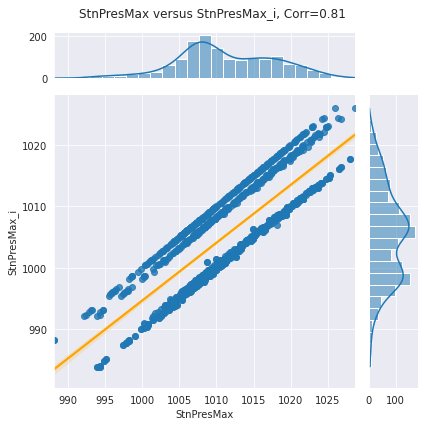

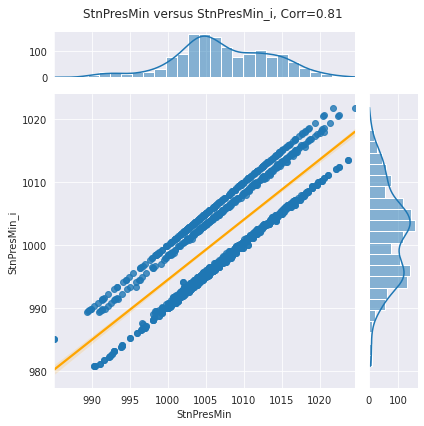

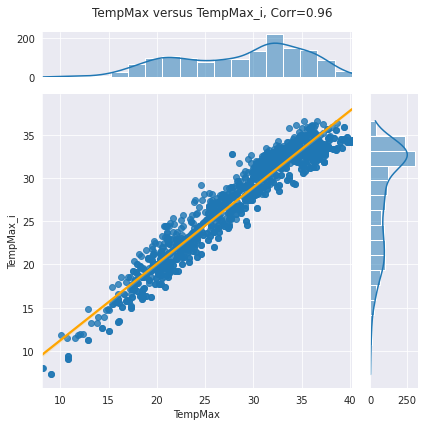

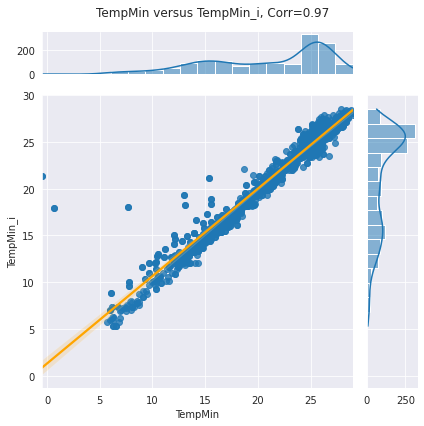

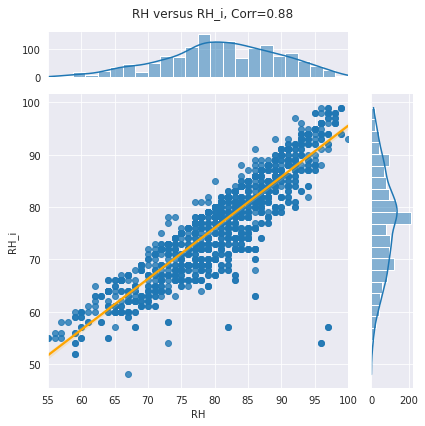

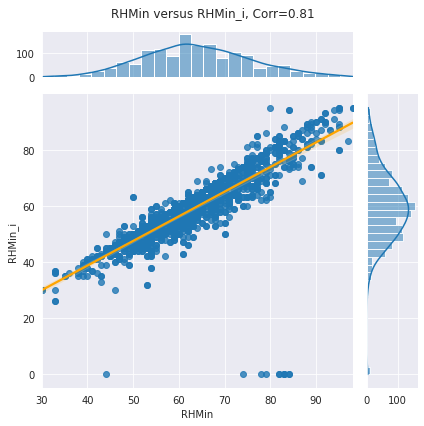

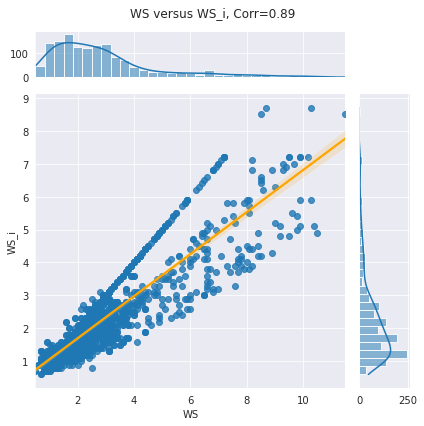

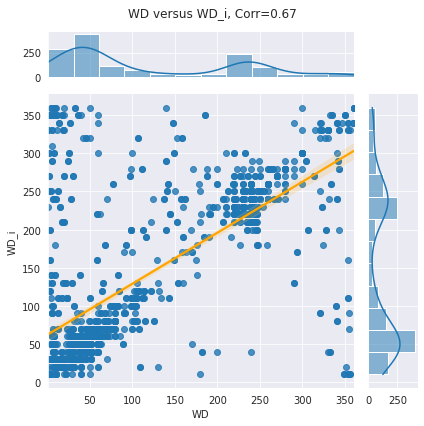

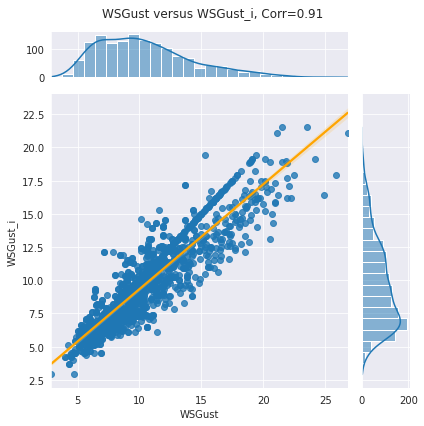

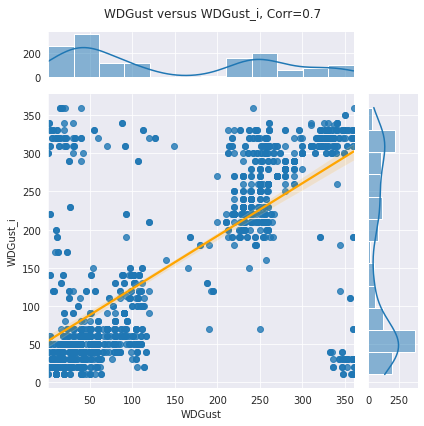

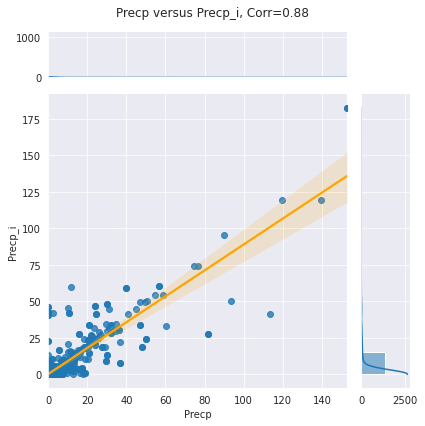

In [7]:
for f in ["StnPres", "StnPresMax", "StnPresMin", 
          "TempMax", "TempMin",
          "RH","RHMin", 
          "WS", "WD", "WSGust", "WDGust",
          "Precp"]:
    plot_bivar(train_n, [f, f"{f}_i"])

In [8]:
for f in ["StnPres", "StnPresMax", "StnPresMin", 
          "TempMax", "TempMin",
          "RH","RHMin", 
          "WS", "WD", "WSGust", "WDGust",
          "Precp"]:
    f_na_idx = train_n[f].isna()
    train_n.loc[f_na_idx, f] = train_n.loc[f_na_idx, f"{f}_i"]
summarize(train_n, "train_n", 1)

=====Summary of train_n=====


,Date,Lat,Lon,Irradiance,Temp,Module,Capacity,Angle,Irradiance_m,Temp_m,Generation,Location,Irradiance_gap,Irradiance_dev,TempSta,IrraSta,StnPres,StnPresMax,StnPresMin,Temp_t,TempMax,TempMin,RH,RHMin,WS,WD,WSGust,WDGust,Precp,StaName,StnPres_i,SeaPres,StnPresMax_i,StnPresMin_i,Temp_i,TempMax_i,TempMin_i,TdDewPoint,RH_i,RHMin_i,WS_i,WD_i,WSGust_i,WDGust_i,Precp_i,PrecpMax10,PrecpMax60,SunShine,Irradiance_i,StaName_i,TempDiff,IrraDiff,clust
0,2020-06-09,25.11,121.26,8.37,26.3,MM60-6RT-300,499.8,22.0,8.37,NaN,630,25.11-121.26,1.776357e-15,False,lz,aic,1006.2,1007.4,1004.7,26.4,29.8,23.6,86.0,70.0,1.0,158.0,5.9,225.0,0.5,lz,997.1,1012.7,998.1,995.8,26.2,29.1,24.0,22.6,81.0,60.0,1.1,170.0,6.8,190.0,2.0,1.0,2.0,9.0,8.37,aic,-0.003788,0.0,N


Shape: (1458, 53)
NaN ratio:


,Temp_m,TempDiff,Temp_t,StaName,Irradiance_gap,Temp_i,TempMax_i,TempMin_i,TdDewPoint,SeaPres,WD_i,PrecpMax60,PrecpMax10,SunShine,StnPres_i,IrraDiff,StnPresMax_i,StnPresMin_i,StaName_i,Irradiance_i,WDGust_i,Precp_i,RH_i,RHMin_i,WS_i,Precp,WSGust_i,Date,WSGust,WDGust,Lat,Lon,Irradiance,Temp,Module,Capacity,Angle,Irradiance_m,Generation,Location,Irradiance_dev,TempSta,IrraSta,StnPres,StnPresMax,StnPresMin,TempMax,TempMin,RH,RHMin,WS,WD,clust
NaN Ratio,100.0,22.633745,22.633745,21.673525,1.234568,0.685871,0.685871,0.685871,0.685871,0.068587,0.068587,0.068587,0.068587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Zero ratio:


,Irradiance_dev,IrraDiff,Precp_i,PrecpMax10,PrecpMax60,Precp,TempDiff,Irradiance_gap,SunShine,Irradiance_m,RHMin_i,Temp_i,StnPresMin_i,Date,StnPresMax_i,TempMin_i,SeaPres,StnPres_i,TempMax_i,WSGust_i,TdDewPoint,RH_i,WS_i,WD_i,WDGust_i,Irradiance_i,StaName_i,StaName,WSGust,WDGust,Lat,Lon,Irradiance,Temp,Module,Capacity,Angle,Temp_m,Generation,Location,TempSta,IrraSta,StnPres,StnPresMax,StnPresMin,Temp_t,TempMax,TempMin,RH,RHMin,WS,WD,clust
Zero Ratio,100.0,99.862826,75.171468,75.102881,75.102881,73.45679,72.908093,9.396433,2.1262,1.234568,0.754458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Dump imputed data snapshot
# train_s.to_csv("../data/processed/0603/train_s.csv", index=False)
# train_n.to_csv("../data/processed/0603/train_n.csv", index=False)

### *Imputation for Testing Set*

In [11]:
test = pd.read_csv("../data/processed/0525/test.csv")

for f in ["WS", "WD", "WSGust", "WDGust", 
          "RH", "RHMin", 
          "TempMin", "TempMax",
          "StnPres", "StnPresMin", "StnPresMax",
          "Precp"]:
    f_na_idx = test[f].isna()
    test.loc[f_na_idx, f] = test.loc[f_na_idx, f"{f}_i"]
summarize(test, "test", 1)

=====Summary of test=====


,ID,Date,Lat,Lon,Irradiance,Temp,Module,Capacity,Angle,Irradiance_m,Temp_m,Generation,TempSta,IrraSta,StnPres,StnPresMax,StnPresMin,Temp_t,TempMax,TempMin,RH,RHMin,WS,WD,WSGust,WDGust,Precp,StaName,StnPres_i,SeaPres,StnPresMax_i,StnPresMin_i,Temp_i,TempMax_i,TempMin_i,TdDewPoint,RH_i,RHMin_i,WS_i,WD_i,WSGust_i,WDGust_i,Precp_i,PrecpMax10,PrecpMax60,SunShine,Irradiance_i,StaName_i
0,1,2021-10-29,24.98,121.03,18.32,22.0,SEC-6M-60A-295,283.2,-31.0,18.3204,NaN,NaN,tya,tya,1014.9,1016.6,1013.8,NaN,25.9,19.7,70.0,54.0,4.2,50.0,11.9,80.0,0.0,NaN,1014.9,1019.7,1016.6,1013.8,22.0,25.9,19.7,16.4,70.0,54.0,4.2,50.0,11.9,80.0,0.0,0.0,0.0,9.1,18.32,tya


Shape: (1539, 48)
NaN ratio:


,Generation,Temp_m,Temp_t,StaName,RH_i,StnPres_i,SeaPres,StnPresMax_i,StnPresMin_i,Temp_i,TempMax_i,TempMin_i,TdDewPoint,ID,RHMin_i,Precp,WD_i,WSGust_i,WDGust_i,Precp_i,PrecpMax10,PrecpMax60,SunShine,Irradiance_i,WS_i,WSGust,WDGust,Date,Lat,Lon,Irradiance,Temp,Module,Capacity,Angle,Irradiance_m,TempSta,IrraSta,StnPres,StnPresMax,StnPresMin,TempMax,TempMin,RH,RHMin,WS,WD,StaName_i
NaN Ratio,100.0,28.589994,17.673814,7.277453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Zero ratio:


,PrecpMax60,PrecpMax10,Precp_i,Precp,Angle,SunShine,TempMin_i,StaName,StnPres_i,SeaPres,StnPresMax_i,StnPresMin_i,Temp_i,TempMax_i,ID,TdDewPoint,RH_i,WDGust,WS_i,WD_i,WSGust_i,WDGust_i,Irradiance_i,RHMin_i,WSGust,Date,TempSta,Lat,Lon,Irradiance,Temp,Module,Capacity,Irradiance_m,Temp_m,Generation,IrraSta,WD,StnPres,StnPresMax,StnPresMin,Temp_t,TempMax,TempMin,RH,RHMin,WS,StaName_i
Zero Ratio,80.116959,80.116959,80.116959,76.023392,21.57245,0.649773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Dump imputed data snapshot
# test.to_csv("../data/processed/0603/test.csv", index=False)

In [13]:
# train_n["ID"] = -1
# train_s["ID"] = -1
# complete2 = pd.concat([train_s, train_n, test], join="inner", ignore_index=True)
# complete2.to_csv("../data/processed/0603/complete.csv", index=False)

## `Temp_m` and `Irradiance_m` Imputation 
These two important features are missing for all generators in North cluster; hence, imputation aming at recovering them is implemented.

### *Retrieve Pre-trained Imputers*

In [14]:
# import wandb

# imp = wandb.init(
#     project="SolarFS", 
#     group="lgbm-vo43afas",
#     job_type="impute",
# )
    
# artif = imp.use_artifact(f"LGBM:v13", type="output")
# artif_path = artif.download()
# imp.finish()

### *Prepare Data for Imputation*

In [15]:
TARGET1, TARGET2 = "Temp_m", "Irradiance_m"
TASK = TARGET2

In [16]:
with open("../config/dp_template.yaml", "r") as f:
    FEATS = yaml.full_load(f)["feats"]

train_s = pd.read_csv("../data/processed/0617/train_s.csv")
train_n = pd.read_csv("../data/processed/0617/train_n.csv")
test = pd.read_csv("../data/processed/0610/test.csv")

In [ ]:
with open(os.path.join(artif_path, "config/dp.yaml"), "r") as f:
    dp_cfg = yaml.full_load(f)

In [18]:
# FE for imputing Temp_m
# for enc_file in ["Location", "Angle"]:
#     with open(os.path.join("../data/trafos/label_enc", f"{enc_file}.pkl"), "rb") as f:
#         enc = pickle.load(f)
#     train_s[enc_file] = enc.transform(train_s[enc_file])
#     train_n[enc_file] = enc.transform(train_n[enc_file])
#     test[enc_file] = enc.transform(test[enc_file])

# feat_eng = FE(
#     add_month=True, 
#     add_module_meta=False, 
#     label_enc=[],
#     mine_temp=[],
#     mine_irrad=[],
#     meta_feats=[],
#     knn_meta_feats={},
# )
# train_s = feat_eng.run(train_s)
# train_n = feat_eng.run(train_n)
# test = feat_eng.run(test)

Adding month indicator...
Done.
Adding month indicator...
Done.
Adding month indicator...
Done.


In [9]:
# FE for imputing Irradiance_m
for enc_file in ["Location"]:
    with open(os.path.join("../data/trafos/label_enc", f"{enc_file}.pkl"), "rb") as f:
        enc = pickle.load(f)
    train_s[enc_file] = enc.transform(train_s[enc_file])
    train_n[enc_file] = enc.transform(train_n[enc_file])
    test[enc_file] = enc.transform(test[enc_file])

feat_eng = FE(
    add_month=True, 
    add_module_meta=False, 
    label_enc=[],
    mine_temp=[],
    mine_irrad=[],
    meta_feats=[],
    knn_meta_feats={},
)
train_s = feat_eng.run(train_s)
train_n = feat_eng.run(train_n)
test = feat_eng.run(test)

Adding month indicator...
Done.
Adding month indicator...
Done.
Adding month indicator...
Done.


In [10]:
feats = [f for f in dp_cfg["feats"] if f != "Date"] + ["Month"]
X_s = train_s[feats]
X_n = train_n[feats]
X_test = test[feats]

### *Load Pre-trained Imputers*

In [ ]:
models = []
model_path = os.path.join(artif_path, "models", "whole")
for model_file in sorted(os.listdir(model_path)):
    with open(os.path.join(model_path, model_file), "rb") as f:
        models.append(pickle.load(f))

### *Start Inference*

In [13]:
train_s[f"{TASK}_pred"] = 0
train_n[f"{TASK}_pred"] = 0
test[f"{TASK}_pred"] = 0

for model in models:
    train_s[f"{TASK}_pred"] += model.predict(X_s) / 5
    train_n[f"{TASK}_pred"] += model.predict(X_n) / 5
    test[f"{TASK}_pred"] += model.predict(X_test) / 5

### *Prediction Analysis*

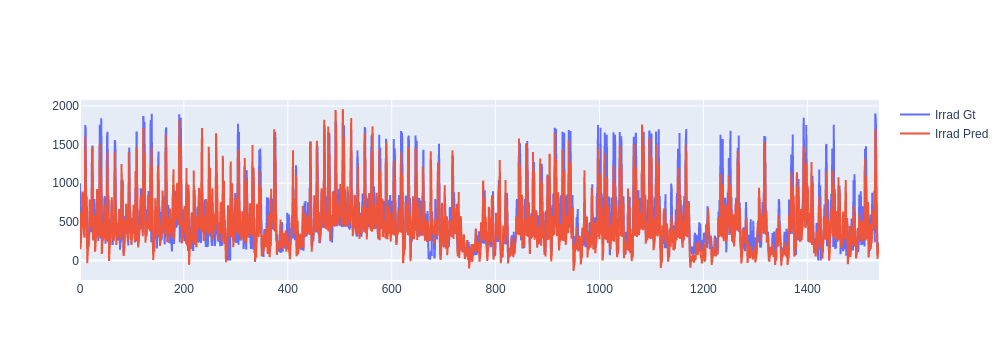

In [16]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=test.index, y=test[TASK], mode="lines", name=f"{TASK} Gt"))
fig.add_trace(go.Scatter(x=test.index, y=test[f"{TASK}_pred"], mode="lines", name=f"{TASK} Pred"))
fig.show()

### *Impute Missing Entries*

In [17]:
# Training set
train_n_new = pd.read_csv("../data/processed/0617/train_n.csv")
train_n_new[TASK] = train_n[f"{TASK}_pred"]
train_s_new = pd.read_csv("../data/processed/0617/train_s.csv")
train = pd.concat([train_n_new, train_s_new], ignore_index=True)

train_n_new.to_csv("../data/processed/0617/train_n.csv", index=False)
train.to_csv("../data/processed/0617/train.csv", index=False)

In [18]:
# Testing set
test_new = pd.read_csv("../data/processed/0610/test.csv")
test_new["Clust"] = test_new["Capacity"].map(cap2clust)
test["Clust"] = test["Capacity"].map(cap2clust)

test_new.loc[test_new["Clust"] == "N", TASK] = test.loc[test["Clust"] == "N", f"{TASK}_pred"]
test_new.to_csv("../data/processed/0617/test.csv", index=False)